In [ ]:
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import sys
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline


df = pd.read_csv('./vaccine_sideeffects.csv', engine='python')
df2 = pd.read_csv('/content/vax-sideeffects-FINAL-2.csv')
df['Happy'] = df2.Happy
df['Sad'] = df2.Sad
df['Angry'] = df2.Angry
df['Fear'] = df2.Fear
df['Suprise'] = df2.Suprise
y = df['V/L']
X = df.drop(columns=['V/L','text','screen_name','Unnamed: 0'])

X = pd.get_dummies(X, dummy_na=True)
labels = np.array(y.tolist())

clf = RandomForestClassifier()
clf.fit(X, labels)


print("Feature ranking:", file=sys.stderr)
importanceDict = {'names':[],'imp':[]}
for name, importance in zip(X.columns, clf.feature_importances_):
    importanceDict['names'] += [name]
    importanceDict['imp'] += [importance]
fRank = pd.DataFrame.from_dict(importanceDict)
fRank = fRank.sort_values(by='imp',ascending=False)
i = 0
for index, row in fRank.iterrows():
    print("%d. %s %f"%(i, row['names'],row['imp']),file=sys.stderr)
    i += 1


# feat_importances = pd.Series(model.feature_importances_, index=X.columns)


# feat_importances.nlargest(len(X.columns)).index.tolist()



Feature ranking:
0. favourites_count 0.079555
1. friends_count 0.077467
2. statuses_count 0.076401
3. followers_count 0.076350
4. listed_count 0.057373
5. favorite_count 0.053423
6. Suprise 0.045919
7. Sad 0.040543
8. Fear 0.035542
9. Happy 0.034352
10. Angry 0.030490
11. sentiment_Negative 0.013643
12. retweet_count 0.013353
13. sentiment_Positive 0.013011
14. sentiment_Neutral 0.008487
15. location_United States 0.007578
16. location_Los Angeles, CA 0.004541
17. location_Scotland 0.004513
18. location_Austin, TX 0.004363
19. location_California, USA 0.004169
20. location_Chicago, IL 0.004124
21. location_New York, NY 0.004115
22. location_California 0.003825
23. location_Texas, USA 0.003716
24. location_Washington, DC 0.003598
25. location_Canada 0.003091
26. location_Houston, TX 0.002981
27. location_New York, USA 0.002972
28. location_Atlanta, GA 0.002807
29. verified 0.002513
30. location_Philadelphia, PA 0.002420
31. location_Brooklyn, NY 0.002336
32. location_Florida, USA 0.0022

In [ ]:
df.columns
# 'text','screen_name','description','name','Unnamed: 10','profile_url'

Index(['Unnamed: 0', 'screen_name', 'text', 'V/L', 'is_retweet',
       'favorite_count', 'retweet_count', 'location', 'followers_count',
       'friends_count', 'listed_count', 'statuses_count', 'favourites_count',
       'verified', 'sentiment', 'Happy', 'Sad', 'Angry', 'Fear', 'Suprise'],
      dtype='object')

         imp                 col
0   1.000000    favourites_count
1   0.973763       friends_count
2   0.960357      statuses_count
3   0.959714     followers_count
4   0.721182        listed_count
5   0.671522      favorite_count
6   0.577196             Suprise
7   0.509627                 Sad
8   0.446765                Fear
9   0.431810               Happy
10  0.383255               Angry
11  0.171493  sentiment_Negative
12  0.167850       retweet_count
13  0.163554  sentiment_Positive
14  0.106681   sentiment_Neutral
15  0.000081            location
16  0.031584            verified
17  0.000000          is_retweet
         imp                 col
0   1.000000    favourites_count
1   0.973763       friends_count
2   0.960357      statuses_count
3   0.959714     followers_count
4   0.721182        listed_count
5   0.671522      favorite_count
6   0.577196             Suprise
7   0.509627                 Sad
8   0.446765                Fear
9   0.431810               Happy
10  0.3832

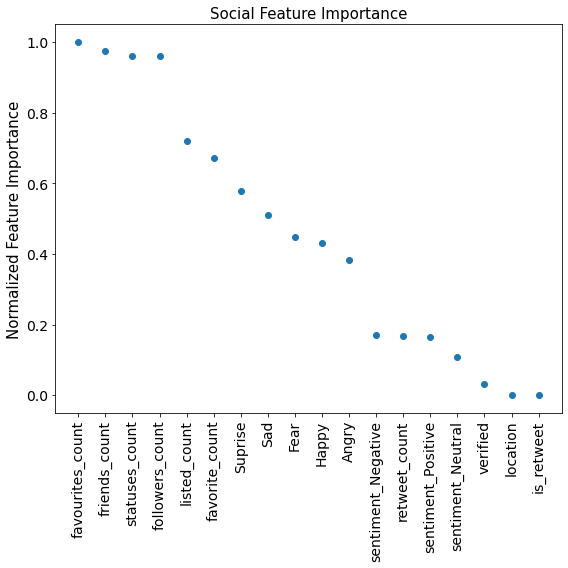

In [ ]:
data = {}
for index, row in fRank.iterrows():
  if '_nan' in row['names']:
    continue
  if 'location' in row['names']:
    if 'location' not in {}:
      data['location'] = row['imp']
    else:
      data['location'] += row['imp']
  else:
    data[row['names']] = row['imp']


cols = []
imp = []
for i in data:
  cols += [i]
  imp += [data[i]]

imp_mx = max(imp)
imp_mn = min(imp)
imp2 = []
for item in imp:
  imp2 += [(item - imp_mn) / (imp_mx-imp_mn)]
# print(imp2)

fig = plt.figure(figsize=(8, 8))
dd = pd.DataFrame(columns=['imp','col'])
dd.imp = imp2
dd.col = cols
print(dd)
dd = dd.sort_values(by=['imp'],ascending=False)
print(dd)
plt.scatter(dd.col,dd.imp)
plt.xticks(rotation = 90,fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Normalized Feature Importance',fontsize=15)
plt.title('Social Feature Importance',fontsize=15)
plt.tight_layout()
plt.savefig('social_importance.pdf')

In [ ]:
df = df.drop(axis=0, columns=['location','is_retweet'])
df

,Unnamed: 0,screen_name,text,V/L,favorite_count,retweet_count,followers_count,friends_count,listed_count,statuses_count,favourites_count,verified,sentiment
0,1,MendiolaGrandma,People almost every vaccine has side effects. ...,V,1,0,613,547,1,201863,217303,False,Positive
1,2,TraceyCorbeil,@YoungStreete @SteveRussell @TorontoStar There...,L,0,0,217,624,2,2740,20571,False,Positive
2,4,taylorsyoung,Got my first shot today so I’m getting gloriou...,L,0,0,111,425,4,465,545,False,Positive
3,7,LeahAshtin,@SonnySaneus This is a totally different type ...,L,2,1,2505,2843,3,2828,32063,False,Positive
4,8,zachwhalen,"I was too self-conscious to take a selfie, but...",L,5,0,2740,1652,108,15763,2452,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,3726,JustmeMandi,@DebiJune2 Congrats Debi!! My 89 year old gram...,L,2,0,1263,1253,8,19164,39741,False,Positive
1597,3727,desolasol,No side effects with 1st vaccine dose. Except ...,L,9,0,3938,2269,19,35385,19737,False,Negative
1598,3728,Horsefur1,Holy fuck they weren't lying when they said se...,V,19,1,697,221,4,1427,934,False,Negative
1599,3729,heelmanitoba,@MedusaBaked Vaccine side effects? I've heard ...,V,0,0,7483,7765,9,31807,18400,False,Positive


In [ ]:
df.to_csv('vax_sideeffects-2.csv')